# Positive Chatbot Analysis

* Import all necessary libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import textwrap

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.stats import pearsonr

* Get the data.

In [2]:
data = pd.read_csv('pos_ch.csv')

## Code the data

* Discard the first column, which has the questionnaire answer timestamp.

In [3]:
data = data.iloc[:, 1:]

* Rename all the columns.

In [4]:
new_column_names = [
    "Gender", "Age", "Education", "Frequency",
    "CS1", "CS2", "CS3", "CS4", 
    "T1", "T2", "T3",
    "PE1", "PE2", "PE3", "PE4", "PE5",
    "PWOM1", "PWOM2", "PWOM3", "PWOM4", "PWOM5",
    "CI1", "CI2",
    "TBF1", "TBF2", "TBF3",
    "TBR1", "TBR2", "TBR3",
    "TBI1", "TBI2",
    "TBC1", "TBC2", "TBC3",
    "TBB1", "TBB2", "TBB3"
]

data.columns = new_column_names

* Code the categorical columns into numbers.

In [5]:
data['Gender Coded'] = data['Gender'].map({'Male': 0, 'Female': 1, 'Other': 2})
data['Age Coded'] = data['Age'].map({'18-24': 0, '25-34': 1, '35-49': 2, '50+': 3})
data['Education Coded'] = data['Education'].map({'Middle School': 0, 'High School': 1, 'University': 2, 'Post-graduate Studies': 3})
data['Frequency Coded'] = data['Frequency'].map({'Several times a day': 0, 'Nearly everyday': 1, 'At least once a week': 2,
                                                 'Less than once a month': 3, 'Never': 4})

* Create dummy variables for each categorical column.

In [6]:
data = pd.get_dummies(data, columns=['Gender Coded', 'Age Coded', 'Education Coded', 'Frequency Coded'], drop_first=False)

* Set construct names and codings.

In [7]:
construct = {
    "Customer Satisfaction": ["CS1", "CS2", "CS3", "CS4"],
    "Trust": ["T1", "T2", "T3"],
    "Positive Emotions": ["PE1", "PE2", "PE3", "PE4", "PE5"],
    "Positive Word of Mouth": ["PWOM1", "PWOM2", "PWOM3", "PWOM4", "PWOM5"],
    "Continuance Intention": ["CI1", "CI2"],
    "TTB - Functionality": ["TBF1", "TBF2", "TBF3"],
    "TTB - Reliability": ["TBR1", "TBR2", "TBR3"],
    "TTB - Integrity": ["TBI1", "TBI2"],
    "TTB - Competence": ["TBC1", "TBC2", "TBC3"],
    "TTB - Benevolence": ["TBB1", "TBB2", "TBB3"]
}

## Descriptive analysis

* Calculate Mean, Median, Mode, Standard Deviation and Variance for all Likert Columns.

In [8]:
# Gather all Likert-scale columns in a list
likert_columns = ["CS1", "CS2", "CS3", "CS4", "T1", "T2", "T3", "PE1", "PE2", "PE3", "PE4", "PE5", "PWOM1", "PWOM2", "PWOM3", "PWOM4", "PWOM5",
                  "CI1", "CI2", "TBF1", "TBF2", "TBF3", "TBR1", "TBR2", "TBR3", "TBI1", "TBI2", "TBC1", "TBC2", "TBC3", "TBB1", "TBB2", "TBB3"]

# Calculate descriptive statistics
descriptive_stats = pd.DataFrame({
    "Mean": data[likert_columns].mean(),
    "Median": data[likert_columns].median(),
    "Mode": data[likert_columns].mode().iloc[0],
    "Standard Deviation": data[likert_columns].std(),
    "Variance": data[likert_columns].var()
})

descriptive_stats

,Mean,Median,Mode,Standard Deviation,Variance
CS1,6.00000,6.0,7,1.077632,1.161290
CS2,6.09375,6.5,7,1.058281,1.119960
CS3,6.09375,6.0,7,0.995453,0.990927
CS4,5.50000,6.0,7,1.586231,2.516129
T1,5.59375,5.5,7,1.316383,1.732863
T2,5.50000,5.0,7,1.319824,1.741935
T3,5.53125,5.0,5,1.163542,1.353831
PE1,5.40625,6.0,7,1.915293,3.668347
PE2,5.50000,6.0,7,1.900764,3.612903
PE3,5.62500,6.0,7,1.601411,2.564516


* Plot the descriptive statistics.

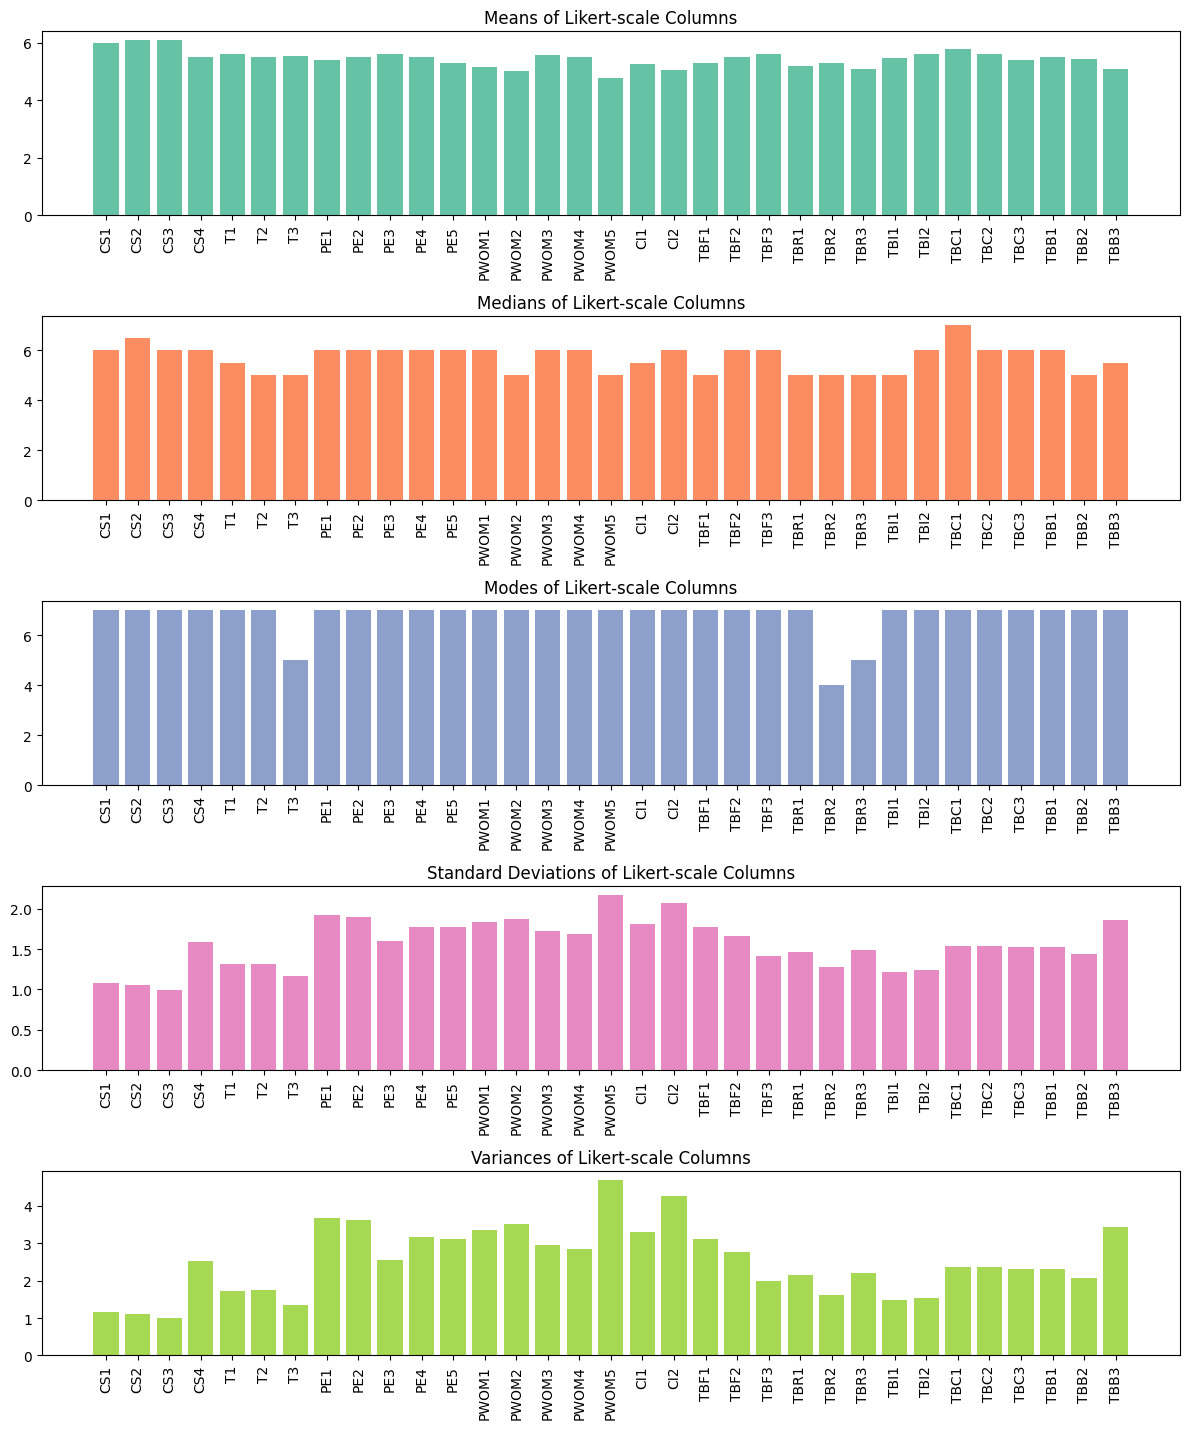

In [9]:
# Use a Seaborn color palette
color_palette = sns.color_palette("Set2", 5)

# Create a grid layout for all statistics
fig, axes = plt.subplots(5, 1, figsize=(12, 15))

# List of statistics and corresponding titles/colors
statistics = [
    ("Mean", "Means of Likert-scale Columns", color_palette[0]),
    ("Median", "Medians of Likert-scale Columns", color_palette[1]),
    ("Mode", "Modes of Likert-scale Columns", color_palette[2]),
    ("Standard Deviation", "Standard Deviations of Likert-scale Columns", color_palette[3]),
    ("Variance", "Variances of Likert-scale Columns", color_palette[4])
]

# List of column names to use as x-axis labels
x_labels = ["CS1", "CS2", "CS3", "CS4", "T1", "T2", "T3", "PE1", "PE2", "PE3", "PE4", "PE5", "PWOM1", "PWOM2", "PWOM3", "PWOM4", "PWOM5",
            "CI1", "CI2", "TBF1", "TBF2", "TBF3", "TBR1", "TBR2", "TBR3", "TBI1", "TBI2", "TBC1", "TBC2", "TBC3", "TBB1", "TBB2", "TBB3"]

# Flatten axes for easier iteration
axes = axes.flatten()

# Plot each statistic in its own subplot
for i, (stat, title, color) in enumerate(statistics):
    ax = axes[i]
    ax.bar(x_labels, descriptive_stats[stat], color=color)
    ax.set_title(title, fontsize=12)
    ax.tick_params(axis='x', rotation=90)

# Hide unused subplot if grid has extra cells
if len(statistics) < len(axes):
    for ax in axes[len(statistics):]:
        ax.axis('off')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

* Calculate Mean and Standard Deviation for all constructs.

In [10]:
construct_stats = {}

# Calculate the mean and std for each construct
for construct_name, items in construct.items():
    means = descriptive_stats.loc[items, "Mean"]
    construct_stats[construct_name] = {
        "Mean": means.mean(),
        "Std": means.std()
    }

# Convert the dictionary to a DataFrame
construct_df = pd.DataFrame.from_dict(construct_stats, orient="index")

# Reset index to make it cleaner
construct_df.reset_index(inplace=True)
construct_df.rename(columns={"index": "Construct"}, inplace=True)

construct_df

,Construct,Mean,Std
0,Customer Satisfaction,5.921875,0.284701
1,Trust,5.541667,0.047735
2,Positive Emotions,5.468750,0.116927
3,Positive Word of Mouth,5.206250,0.326708
4,Continuance Intention,5.156250,0.132583
5,TTB - Functionality,5.468750,0.143205
6,TTB - Reliability,5.187500,0.093750
7,TTB - Integrity,5.531250,0.088388
8,TTB - Competence,5.593750,0.187500
9,TTB - Benevolence,5.343750,0.218750


* Plot the Means and Standard Deviations.

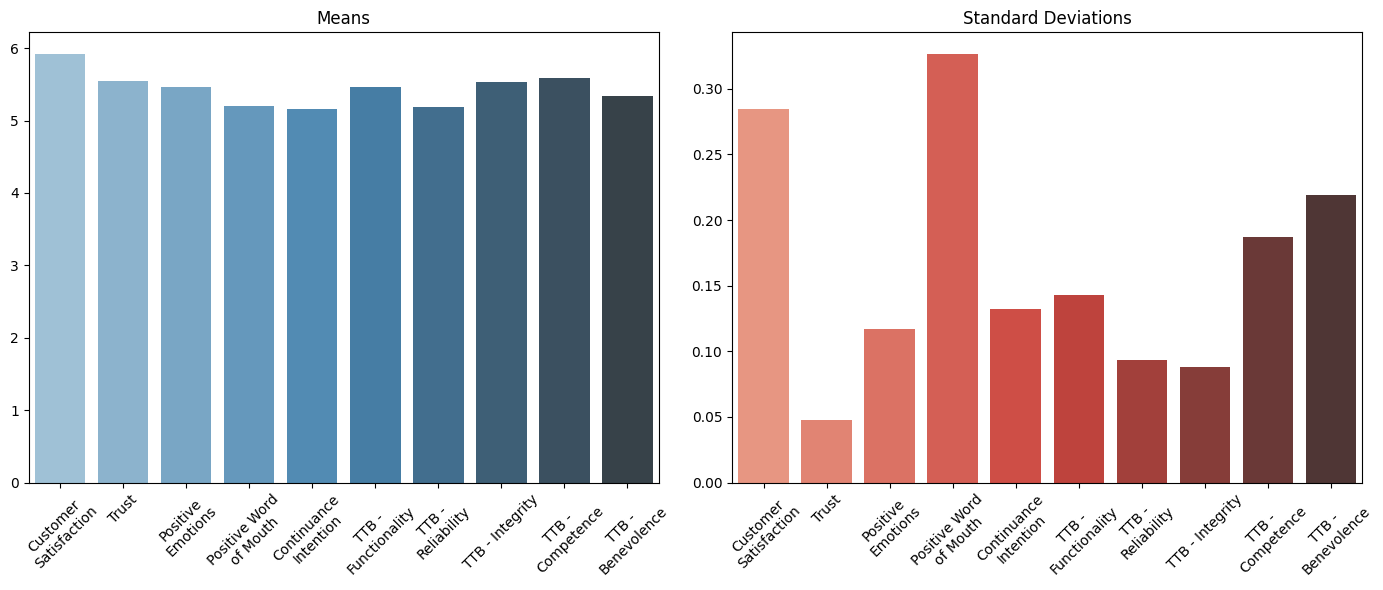

In [11]:
# Create a figure and grid
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=False)

# Plot the Means
sns.barplot(
    ax=axes[0],
    data=construct_df,
    x="Construct",
    y="Mean",
    palette="Blues_d",
    hue="Construct",
    dodge=False
)
axes[0].set_title("Means")
axes[0].tick_params(axis="x", rotation=45)
axes[0].set_xlabel("")
axes[0].set_ylabel("")

# Plot the Standard Deviations
sns.barplot(
    ax=axes[1],
    data=construct_df,
    x="Construct",
    y="Std",
    palette="Reds_d",
    hue="Construct",
    dodge=False
)
axes[1].set_title("Standard Deviations")
axes[1].tick_params(axis="x", rotation=45)
axes[1].set_xlabel("")
axes[1].set_ylabel("")

# Wrap x-axis labels
for ax in axes:
    ticks = ax.get_xticks()
    labels = [textwrap.fill(label.get_text(), width=15) for label in ax.get_xticklabels()]
    ax.set_xticks(ticks)
    ax.set_xticklabels(labels)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

* Do a distribution analysis using box plots.

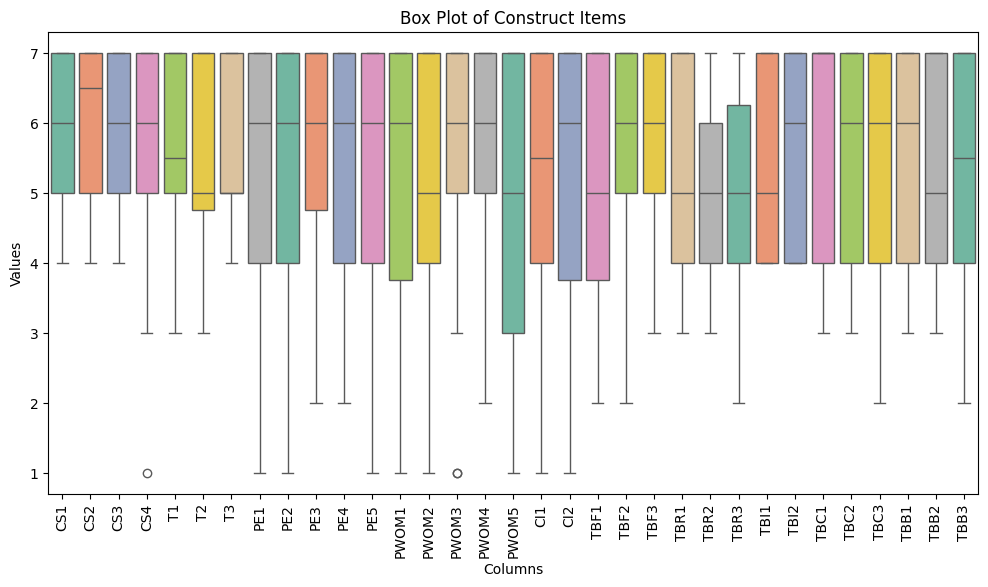

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[likert_columns], palette="Set2")
plt.xticks(rotation=90)
plt.title("Box Plot of Construct Items")
plt.xlabel("Columns")
plt.ylabel("Values")
plt.show()

## Clustering for personas

* Use clustering to divide the chatbot users to different personas.

In [13]:
# Features used in clustering
features = data[['Frequency Coded_0', 'Frequency Coded_1', 'Frequency Coded_2', 'Frequency Coded_3', 'Frequency Coded_4',
                 'CS1', 'CS2', 'CS3', 'CS4', 'T1', 'T2', 'T3', 'PE1', 'PE2', 'PE3', 'PE4', 'PE5']]

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [14]:
# Choose the number of clusters
kmeans = KMeans(n_clusters=2, random_state=40)

# Fit the model
data['Cluster'] = kmeans.fit_predict(scaled_features)

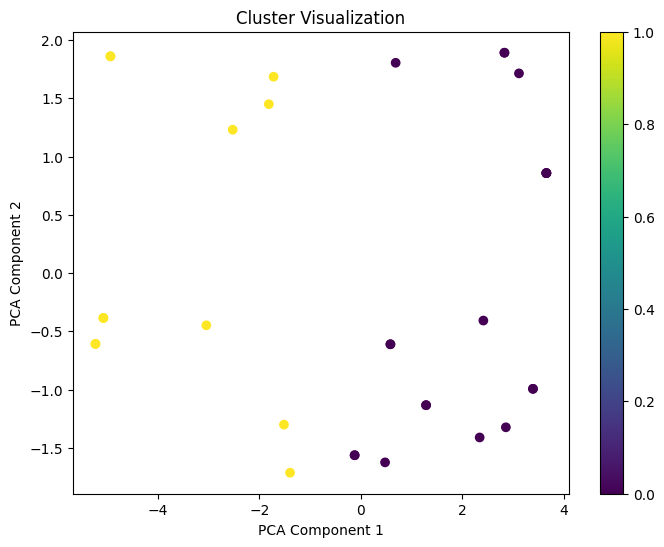

In [15]:
# Reduce dimensions to 2D
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

# Plot the clusters
plt.figure(figsize=(8,6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=data['Cluster'], cmap='viridis')
plt.title('Cluster Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()

* Calculate and display the clustering results.

In [16]:
# Select only numeric columns for grouping
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Group by cluster and calculate the mean for only numeric columns
persona_analysis = data.groupby('Cluster')[numeric_columns].mean()

# Display the results
persona_analysis

,CS1,CS2,CS3,CS4,T1,T2,T3,PE1,PE2,PE3,...,TBR2,TBR3,TBI1,TBI2,TBC1,TBC2,TBC3,TBB1,TBB2,TBB3
Cluster,,,,,,,,,,,,,,,,,,,,,
0,6.700000,6.650000,6.75,6.200000,6.350000,6.1,6.15,6.650000,6.750000,6.700000,...,5.800000,5.90,6.150000,6.10,6.500000,6.050000,5.900000,6.25,6.15,6.20
1,4.833333,5.166667,5.00,4.333333,4.333333,4.5,4.50,3.333333,3.416667,3.833333,...,4.416667,3.75,4.333333,4.75,4.583333,4.833333,4.583333,4.25,4.25,3.25


* Calculate and display the number of chatbot users in each cluster.

In [17]:
# Count the number of people in each cluster
cluster_counts = data['Cluster'].value_counts()

# Display the count for each cluster
cluster_counts

Cluster
0    20
1    12
Name: count, dtype: int64

* Calculate and display the means for each construct in the clusters.

In [18]:
categories = {
    "CS": ["CS1", "CS2", "CS3", "CS4"],
    "T": ["T1", "T2", "T3"],
    "PE": ["PE1", "PE2", "PE3", "PE4", "PE5"],
    "PWoM": ["PWOM1", "PWOM2", "PWOM3", "PWOM4", "PWOM5"],
    "CI": ["CI1", "CI2"],
    "TBF": ["TBF1", "TBF2", "TBF3"],
    "TBR": ["TBR1", "TBR2", "TBR3"],
    "TBI": ["TBI1", "TBI2"],
    "TBC": ["TBC1", "TBC2", "TBC3"],
    "TBB": ["TBB1", "TBB2", "TBB3"]
}

for category, columns in categories.items():
    print(f'{category} means')
    means = [persona_analysis.loc[cluster, columns].mean() for cluster in persona_analysis.index]
    print(means)

CS means
[6.575, 4.833333333333333]
T means
[6.2, 4.444444444444444]
PE means
[6.62, 3.55]
PWoM means
[6.140000000000001, 3.65]
CI means
[6.225, 3.375]
TBF means
[6.183333333333333, 4.277777777777778]
TBR means
[5.849999999999999, 4.083333333333333]
TBI means
[6.125, 4.541666666666666]
TBC means
[6.150000000000001, 4.666666666666667]
TBB means
[6.2, 3.9166666666666665]


* Cluster 0: Most CS, Most T, Most PE, Most PWOM, Most CI, Most TBF, Most TBR, Most TBI, Most TBC, Most TBB
* Cluster 1: Least CS, Least T, Least PE, Least PWOM, Least CI, Least TBF, Least TBR, Least TBI, Least TBC, Least TBB

## Correlation matrix

* Create a correlation matrix of all constructs.

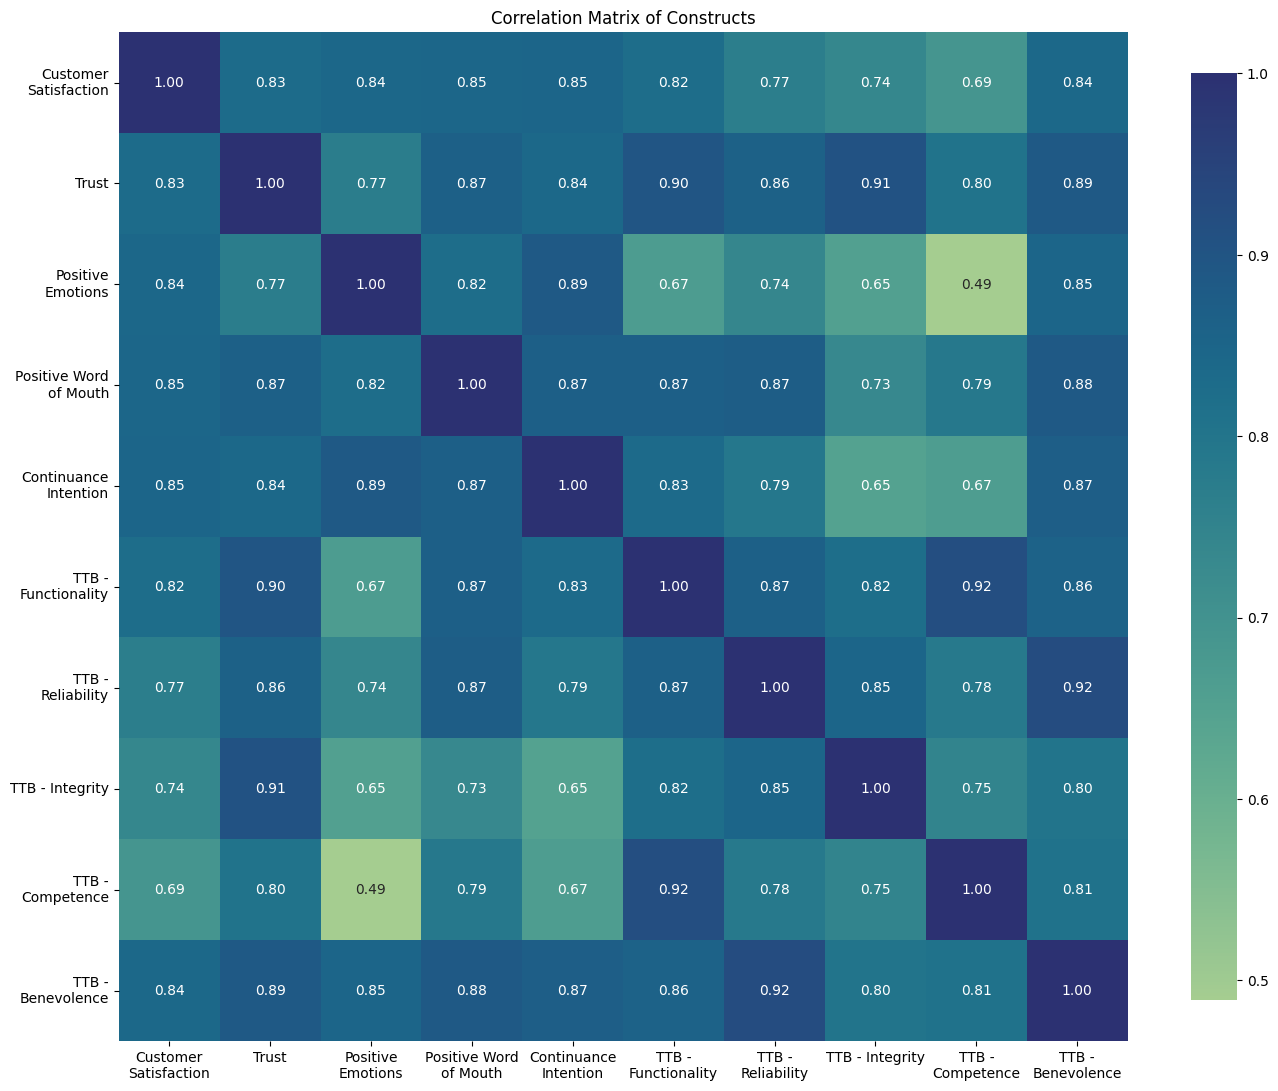

P-value matrix:


,Customer Satisfaction,Trust,Positive Emotions,Positive Word of Mouth,Continuance Intention,TTB - Functionality,TTB - Reliability,TTB - Integrity,TTB - Competence,TTB - Benevolence
Customer Satisfaction,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0
Trust,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0
Positive Emotions,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.004,0.0
Positive Word of Mouth,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0
Continuance Intention,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0
TTB - Functionality,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0
TTB - Reliability,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0
TTB - Integrity,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0
TTB - Competence,0.0,0.0,0.004,0.0,0.0,0.0,0.0,0.0,0.000,0.0
TTB - Benevolence,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.000,0.0


In [19]:
# Calculate construct scores
construct_scores = pd.DataFrame()
for construct_name, items in construct.items():
    construct_scores[construct_name] = data[items].mean(axis=1)

# Initialize empty DataFrames for correlations and p-values
construct_names = construct_scores.columns
corr_matrix = pd.DataFrame(index=construct_names, columns=construct_names, dtype=float)
pval_matrix = pd.DataFrame(index=construct_names, columns=construct_names, dtype=float)

# Compute correlation coefficients and p-values
for i in construct_names:
    for j in construct_names:
        r, p = pearsonr(construct_scores[i], construct_scores[j])
        corr_matrix.loc[i, j] = r
        pval_matrix.loc[i, j] = p

# Plot the correlation matrix heatmap
plt.figure(figsize=(14, 12))
ax = sns.heatmap(corr_matrix.astype(float), annot=True, fmt=".2f", cmap="crest", square=True, cbar_kws={"shrink": .8})

# Wrap the tick labels
wrapped_labels_x = [textwrap.fill(label, 15) for label in corr_matrix.columns]
wrapped_labels_y = [textwrap.fill(label, 15) for label in corr_matrix.index]
ax.set_xticklabels(wrapped_labels_x, rotation=0, ha='center')
ax.set_yticklabels(wrapped_labels_y, rotation=0)
plt.title("Correlation Matrix of Constructs")
plt.tight_layout()
plt.show()

# Display p-value matrix
print("P-value matrix:")
pval_matrix.round(3)

## Cross-tabs

* Do a cross-tabs analysis between frequency of chatbot use and education and display it.

In [20]:
cross_tab = pd.crosstab(data['Frequency'], data['Education'])
cross_tab

Education,High School,Post-graduate Studies,University
Frequency,,,
At least once a week,0,1,5
Less than once a month,0,2,2
Nearly everyday,2,0,7
Never,0,2,0
Several times a day,1,4,6


* Do a cross-tabs analysis between frequency of chatbot use and age and display it.

In [21]:
cross_tab = pd.crosstab(data['Frequency'], data['Age'])
cross_tab

Age,18-24,25-34,35-49,50+
Frequency,,,,
At least once a week,4,0,1,1
Less than once a month,0,1,3,0
Nearly everyday,6,0,0,3
Never,0,0,2,0
Several times a day,8,1,2,0


## Regression analysis

* Use OLS regression to show the connection between technology trusting beliefs and trust.

In [22]:
# Calculate mean values for each construct by averaging its items
for construct, items in construct.items():
    data[construct] = data[items].mean(axis=1)

# Set independent variables
X = data[["TTB - Functionality", "TTB - Reliability", "TTB - Integrity", "TTB - Competence", "TTB - Benevolence"]]

# Set dependent variable
y = data["Trust"]

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Create and fit the regression model
model = sm.OLS(y, X).fit()

# Display the model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Trust   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     59.91
Date:                Fri, 27 Jun 2025   Prob (F-statistic):           1.94e-13
Time:                        14:28:56   Log-Likelihood:                -10.755
No. Observations:                  32   AIC:                             33.51
Df Residuals:                      26   BIC:                             42.30
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.5568      0.337      1.652      0.111      -0.136       1.250
TTB - Functionality     0.3957      0.144      2.742      0.011       0.099       0.692
TTB - Reliability      -0.2272      0.157     -1.444      0.161      -0.551       0.096
TTB - Integrity         0.5011      0.114      4.389      0.000       0.266       0.736
TTB - Competence       -0.1466      0.121     -1.213      0.236      -0.395       0.102
TTB - Benevolence       0.3832      0.134      2.869      0.008       0.109       0.658
==============================================================================
Omnibus:                        1.107   Durbin-Watson:                   2.335
Prob(Omnibus):                  0.575   Jarque-Bera (JB):                1.102
Skew:                          -0.358   Prob(JB):                        0.576
Kurtosis:                       2.440   Cond. No.                         65.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Use OLS regression to show the connection between trust and continuance intention/satisfaction. (H4-H5)

In [23]:
# Set independent variables
X = data[["Continuance Intention", "Customer Satisfaction"]]

# Set dependent variable
y = data["Trust"]

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Create and fit the regression model
model = sm.OLS(y, X).fit()

# Display the model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Trust   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     45.08
Date:                Fri, 27 Jun 2025   Prob (F-statistic):           1.26e-09
Time:                        14:28:56   Log-Likelihood:                -28.581
No. Observations:                  32   AIC:                             63.16
Df Residuals:                      29   BIC:                             67.56
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.9503      0.812      1.170      0.251      -0.710       2.611
Continuance Intention     0.3108      0.112      2.782      0.009       0.082       0.539
Customer Satisfaction     0.5047      0.208      2.421      0.022       0.078       0.931
==============================================================================
Omnibus:                        1.078   Durbin-Watson:                   2.389
Prob(Omnibus):                  0.583   Jarque-Bera (JB):                0.875
Skew:                           0.093   Prob(JB):                        0.646
Kurtosis:                       2.212   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""